# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ! pip install missingno
import missingno as msno

# HOUR = 1
HOUR = 24

RANDOM_STATE = 8

TEST_SIZE = 0.2
NONULL_RATIO = 0.5

# read data

In [2]:
index_col = ['pID','Ent_datetime']
df = pd.read_table('../../../data/patient/patient_info_summarized_numeric4_{}.txt'.format(HOUR), \
    low_memory=False)#, index_col=index_col)
df_category = pd.read_table('../../../data/patient/patient_info_summarized_category4_{}.txt'.format(HOUR), \
    low_memory=False)
df_bed = pd.read_table('../../../data/patient/patient_info_summarized_bed4_{}.txt'.format(HOUR), \
    low_memory=False)


# drop duplicated

In [3]:
df[df[['pID','Ent_datetime']].duplicated()]

,pID,Ent_datetime,Age,height,weight,days_of_stay,Accute_DIC,SOFA_score,apache2_score,apache2_est_mortality,...,SVV(Vigileo),rSO2-1(INVOS),rSO2-2(INVOS),rSO2-3(INVOS),rSO2-4(INVOS),TBlood,SVV,ScvO2,APTT1,APTT2
676,nOWzDMmn,2011-04-22 13:35,79.0,145.0,38.3,0.0,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7174,90bxVjZ3,2014-09-23 16:26,0.0,NaN,NaN,0.0,5,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.5,2.8


In [4]:
def compare_rows(df_, pid_):
    a0 = df_[df_.pID == pid_].iloc[0,:]
    a1 = df_[df_.pID == pid_].iloc[1,:]
    for i in range(len(a0)):
        if a0[i] != a1[i]:
            print(i, df_.columns[i], a0[i], a1[i])

## nOWzDMmn

In [5]:
pid = 'nOWzDMmn'
compare_rows(df, pid)

11 GOT nan 19
12 GPT nan 3
13 LDH nan 136
14 ALP nan 162
15 G-GTP nan 3
16 CHE nan nan
17 AMY nan 141
18 CPK nan 475
19 TP  nan 4.1
20 Alb nan 2.6
21 UA nan nan
22 UN nan 7
23 CRE nan 0.50
24 T-Bil nan 0.8
25 Na nan 139
26 K nan 3.4
27 Cl nan 107
28 Ca nan 7.4
29 T-CHO nan nan
30 CRP nan 9.0
31 ammonia nan nan
32 PT-SEC nan nan
33 PT-PER nan nan
34 PT-INR nan nan
35 WBC nan 10.0
36 RBC nan 3.24
37 HGB nan 9.4
38 HCT nan 29.1
39 MCV nan 89.8
40 MCH nan 29.0
41 MCHC nan 32.3
42 RDW nan nan
43 PLT nan 166
44 PCT nan nan
45 MPV nan nan
46 PDW nan nan
47 FDP nan nan
48 AT3 nan nan
49 ST nan nan
50 SEG nan nan
51 EO nan nan
52 BA nan nan
53 MO nan nan
54 LY nan nan
55 ERYTHR.B nan nan
56 FG nan nan
57 MYEL nan nan
58 ANISO nan nan
59 pH nan 7.44
60 pCO2 nan 44
61 pO2 nan 79
62 HCO3- nan 29.9
63 TCO2 nan 31.3
64 BEecf nan 5.7
65 BE_B nan 5.2
66 SO2 nan 98.4
67 SO2C nan 96
68 THb nan 7.1
69 THbc nan 8.4
70 Hct nan 27
71 Na+ nan 137
72 K+ nan 3.2
73 Cl- nan 108
74 Ca++ nan 0.91
75 AG nan 7
76 G

In [6]:
df.loc[(df.pID == pid)&(df.WBC.isnull()),'pID'] = 'DELETE'

In [7]:
compare_rows(df_category, pid)

26 department_Esophageal_gastrointestinal_surgery 1 0
49 department_nan 0 1
146 FIM_score_0 0 1
148 FIM_score_No 1 0
153 outcome1_Transfer building 0 1
154 outcome1_nan 1 0
160 outcome2_Improved 0 1
162 outcome2_nan 1 0
168 Severity_of_sepsis_Improved 0 1
170 Severity_of_sepsis_nan 1 0


In [8]:
df_category.loc[(df_category.pID == pid)&(df_category.department_nan == 1),'pID'] = 'DELETE'

In [9]:
compare_rows(df_bed, pid)

2 bed_A1 nan nan
3 bed_A2 nan nan
4 bed_A3 nan nan
5 bed_A4 nan nan
6 bed_A5 nan nan
7 bed_A6 1.0 1267.0
8 bed_A7 nan nan
9 bed_A8 nan nan
10 bed_C1 nan nan
11 bed_C2 nan nan
12 bed_C3 nan nan
13 bed_C4 nan nan
14 bed_C5 nan nan
15 bed_C6 nan nan
16 bed_B1 nan nan
17 bed_B2 nan nan
18 bed_B3 nan nan
19 bed_B4 nan nan
20 bed_B5 nan nan
21 bed_B6 nan nan
22 bed_B7 nan nan
23 bed_B8 nan nan
24 bed_Ward1 nan nan
25 bed_Ward2 nan nan
26 bed_Ward3 nan nan
27 bed_Ward4 nan nan
28 bed_Ward5 nan nan
29 bed_Ward6 nan nan
30 bed_Ward7 nan nan
31 bed_Ward8 nan nan
32 bed_Ward9 nan nan
33 bed_Ward10 nan nan
34 bed_EROPE nan nan
35 bed_ER1 nan nan
36 bed_ER2 nan nan
37 bed_Emergency5 nan nan
38 bed_Emergency8 nan nan
39 bed_Emergency10 nan nan
40 bed_Temporary1 nan nan
41 bed_Temporary2 nan nan
42 bed_Emergency_Temporary1 nan nan
43 bed_Emergency_Temporary2 nan nan


In [10]:
df_bed.loc[(df_bed.pID == pid)&(df_bed['bed_A6'] <= 1),'pID'] = 'DELETE'

## 90bxVjZ3

In [11]:
pid = '90bxVjZ3'
compare_rows(df, pid)

3 height nan nan
4 weight nan nan
6 Accute_DIC nan 5
7 SOFA_score nan 14
8 apache2_score nan nan
9 apache2_est_mortality nan nan
10 SIRS_score nan 3
11 GOT nan 447
12 GPT nan 141
13 LDH nan 2095
14 ALP nan 374
15 G-GTP nan 157
16 CHE nan 212
17 AMY nan 26
18 CPK nan 2089
19 TP  nan 3.8
20 Alb nan 2.4
21 UA nan 6.7
22 UN nan 11
23 CRE nan 0.43
24 T-Bil nan 5.3
25 Na nan 144
26 K nan 5.4
27 Cl nan 112
28 Ca nan 6.1
29 T-CHO nan 134
30 CRP nan 4.9
31 ammonia nan 200
32 PT-SEC nan 16.8
33 PT-PER nan 34
34 PT-INR nan 1.59
35 WBC nan 9.5
36 RBC nan 3.85
37 HGB nan 12.5
38 HCT nan 37.9
39 MCV nan 98.4
40 MCH nan 32.5
41 MCHC nan 33.0
42 RDW nan nan
43 PLT nan 236
44 PCT nan nan
45 MPV nan nan
46 PDW nan nan
47 FDP nan 128.5
48 AT3 nan 97
49 ST nan 26.5
50 SEG nan 11.5
51 EO nan 0.0
52 BA nan 0.0
53 MO nan 11.0
54 LY nan 44.5
55 ERYTHR.B nan 13
56 FG nan 163
57 MYEL nan nan
58 ANISO nan nan
59 pH nan 7.07
60 pCO2 nan 99
61 pO2 nan 53
62 HCO3- nan 28.7
63 TCO2 nan 31.7
64 BEecf nan -1.4
65 BE_B

In [12]:
df.loc[(df.pID == pid)&(df.Accute_DIC.isnull()),'pID'] = 'DELETE'

In [13]:
compare_rows(df_category, pid)

8 Blood_ABO_O 0 1
11 Blood_ABO_nan 1 0
13 Blood_Rh_Rh_- 0 1
14 Blood_Rh_nan 1 0
150 outcome1_Dead (with autopsy) 0 1
154 outcome1_nan 1 0
156 outcome2_Dead 0 1
162 outcome2_nan 1 0
164 Severity_of_sepsis_Dead 0 1
170 Severity_of_sepsis_nan 1 0


In [14]:
df_category.loc[(df_category.pID == pid)&(df_category.Blood_ABO_nan == 1),'pID'] = 'DELETE'

In [15]:
compare_rows(df_bed, pid)

2 bed_A1 1.0 nan
3 bed_A2 nan nan
4 bed_A3 nan nan
5 bed_A4 nan nan
6 bed_A5 nan nan
7 bed_A6 nan nan
8 bed_A7 nan nan
9 bed_A8 nan nan
10 bed_C1 nan 1204.0
11 bed_C2 nan nan
12 bed_C3 nan nan
13 bed_C4 nan nan
14 bed_C5 nan nan
15 bed_C6 nan nan
16 bed_B1 nan nan
17 bed_B2 nan nan
18 bed_B3 nan nan
19 bed_B4 nan nan
20 bed_B5 nan nan
21 bed_B6 nan nan
22 bed_B7 nan nan
23 bed_B8 nan nan
24 bed_Ward1 nan nan
25 bed_Ward2 nan nan
26 bed_Ward3 nan nan
27 bed_Ward4 nan nan
28 bed_Ward5 nan nan
29 bed_Ward6 nan nan
30 bed_Ward7 nan nan
31 bed_Ward8 nan nan
32 bed_Ward9 nan nan
33 bed_Ward10 nan nan
34 bed_EROPE nan nan
35 bed_ER1 nan nan
36 bed_ER2 nan nan
37 bed_Emergency5 nan nan
38 bed_Emergency8 nan nan
39 bed_Emergency10 nan nan
40 bed_Temporary1 nan nan
41 bed_Temporary2 nan nan
42 bed_Emergency_Temporary1 nan nan
43 bed_Emergency_Temporary2 nan nan


In [16]:
df_bed.loc[(df_bed.pID == pid)&(df_bed.bed_C1.isnull()),'pID'] = 'DELETE'

In [17]:
df = df[df.pID != 'DELETE']
df_category = df_category[df_category.pID != 'DELETE']
df_bed = df_bed[df_bed.pID != 'DELETE']
df_bed.drop_duplicates(inplace=True)

In [18]:
df.shape, df_category.shape, df_bed.shape

((16169, 165), (16169, 171), (16169, 44))

# set index

In [19]:
df = df.set_index(index_col)
df_category = df_category.set_index(index_col)
df_bed = df_bed.set_index(index_col)

# save

In [20]:
df.to_csv('../../../data/patient/patient_info_summarized_numeric4_{}_drop_duplicated.txt'.format(HOUR), sep='\t')
df_category.to_csv('../../../data/patient/patient_info_summarized_category4_{}_drop_duplicated.txt'.format(HOUR), sep='\t')

# convert to numeric

In [21]:
cols = df.columns
for col in cols:
    df.loc[:,col] = pd.to_numeric(df[col], errors='coerce')

# delete all nan columns

In [22]:
for col in df.columns:
    if df[col].isnull().sum() == len(df):
        print(col)
        df.drop(col, axis=1, inplace=True)

confirmed_doctor


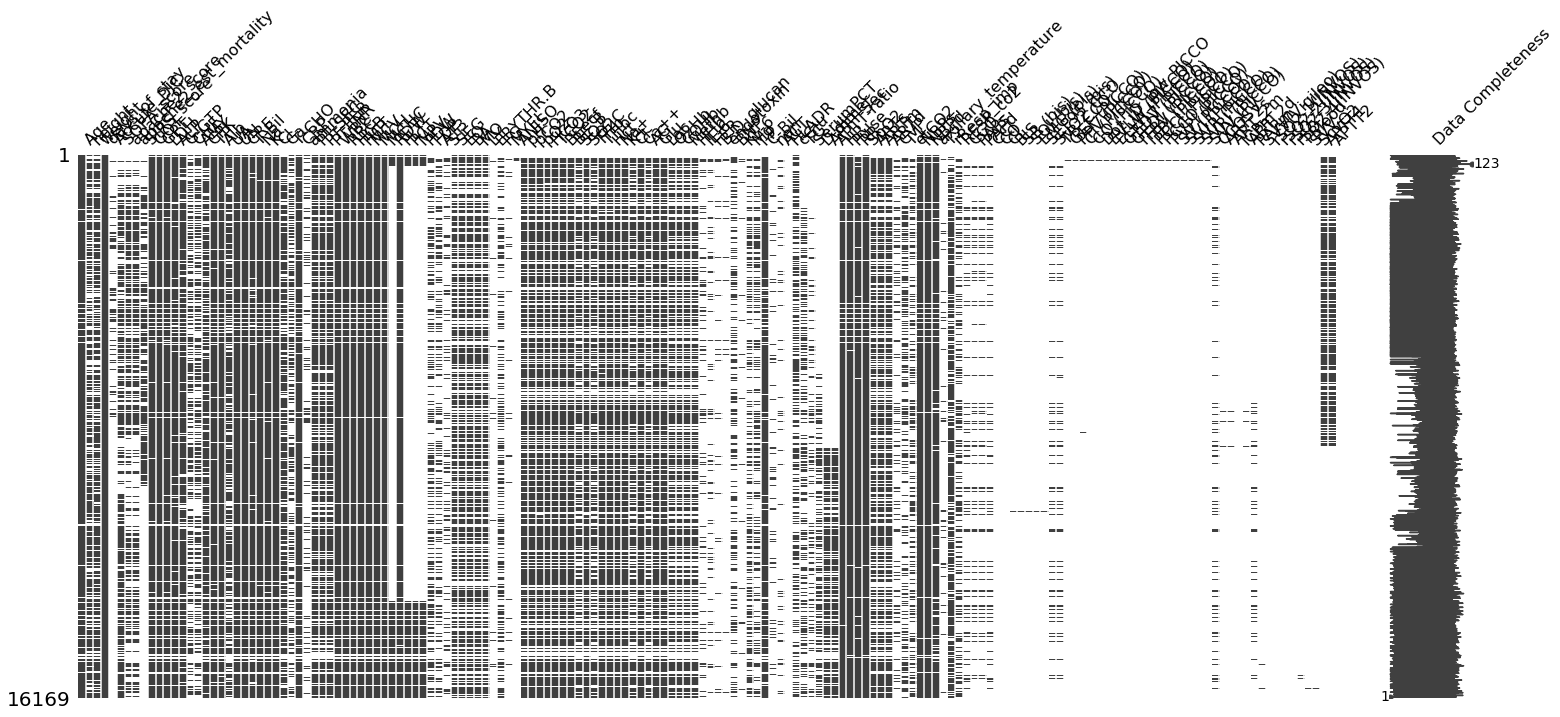

In [23]:
msno.matrix(df, labels=True)

In [24]:
df.columns.values

array(['Age', 'height', 'weight', 'days_of_stay', 'Accute_DIC',
       'SOFA_score', 'apache2_score', 'apache2_est_mortality',
       'SIRS_score', 'GOT', 'GPT', 'LDH', 'ALP', 'G-GTP', 'CHE', 'AMY',
       'CPK', 'TP ', 'Alb', 'UA', 'UN', 'CRE', 'T-Bil', 'Na', 'K', 'Cl',
       'Ca', 'T-CHO', 'CRP', 'ammonia', 'PT-SEC', 'PT-PER', 'PT-INR',
       'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'PLT',
       'PCT', 'MPV', 'PDW', 'FDP', 'AT3', 'ST', 'SEG', 'EO', 'BA', 'MO',
       'LY', 'ERYTHR.B', 'FG', 'MYEL', 'ANISO', 'pH', 'pCO2', 'pO2',
       'HCO3-', 'TCO2', 'BEecf', 'BE_B', 'SO2', 'SO2C', 'THb', 'THbc',
       'Hct', 'Na+', 'K+', 'Cl-', 'Ca++', 'AG', 'Glu', 'Lac', 'O2Hb',
       'COHb', 'Methb', 'HHb', 'IL-6', 'FER', 'B-D_glucan', 'endotoxin',
       'BNP', 'KL-6', 'Mg', 'I-P', 'C-Bil', 'nan', 'ACT', 'HLADR', 'cGlu',
       'TG', 'SerumPCT', 'D-dimer', 'APTT-Sec', 'APTT-ratio', 'HR',
       'Pulse', 'RR', 'SpO2', 'ARTs', 'ARTm', 'ARTd', 'CVP', 'T1',
       'etCO2', 'NBPs

In [25]:
sort_cols = ['GOT', 'GPT', 'LDH', 'ALP', 'G-GTP', 'CHE', 'AMY',
       'CPK', 'TP ', 'Alb', 'UA', 'UN', 'CRE', 'T-Bil', 'Na', 'K', 'Cl',
       'Ca', 'T-CHO', 'CRP', 'ammonia', 'PT-SEC', 'PT-PER', 'PT-INR',
       'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'PLT',
       'PCT', 'MPV', 'PDW', 'FDP', 'AT3', 'ST', 'SEG', 'EO', 'BA', 'MO',
       'LY', 'ERYTHR.B', 'FG', 'MYEL', 'ANISO', 'pH', 'pCO2', 'pO2',
       'HCO3-', 'TCO2', 'BEecf', 'BE_B', 'SO2', 'SO2C', 'THb', 'THbc',
       'Hct', 'Na+', 'K+', 'Cl-', 'Ca++', 'AG', 'Glu', 'Lac', 'O2Hb',
       'COHb', 'Methb', 'HHb', 'IL-6', 'FER', 'B-D_glucan', 'endotoxin',
       'BNP', 'KL-6', 'Mg', 'I-P', 'C-Bil', 'ACT', 'HLADR', 'cGlu', 'TG',
       'SerumPCT', 'D-dimer', 'APTT-Sec', 'APTT-ratio', 'HR', 'Pulse',
       'RR', 'SpO2', 'ARTs', 'ARTm', 'ARTd', 'CVP', 'T1', 'etCO2', 'NBPs',
       'NBPd', 'axillary_temperature', 'T2', 'rResp_imp', 'RESP_co2',
       'CCO', 'PAPs', 'PAPd', 'CCI', 'CO', 'CI', 'SvO2_CCO', 'TB_CCO',
       'GEF (PICCO)', 'CCOSV', 'ICPm', 'PAPm', 'TBlood', 'APTT1', 'APTT2','Age', 'height', 'weight']
df_sort = df.sort_values(sort_cols)


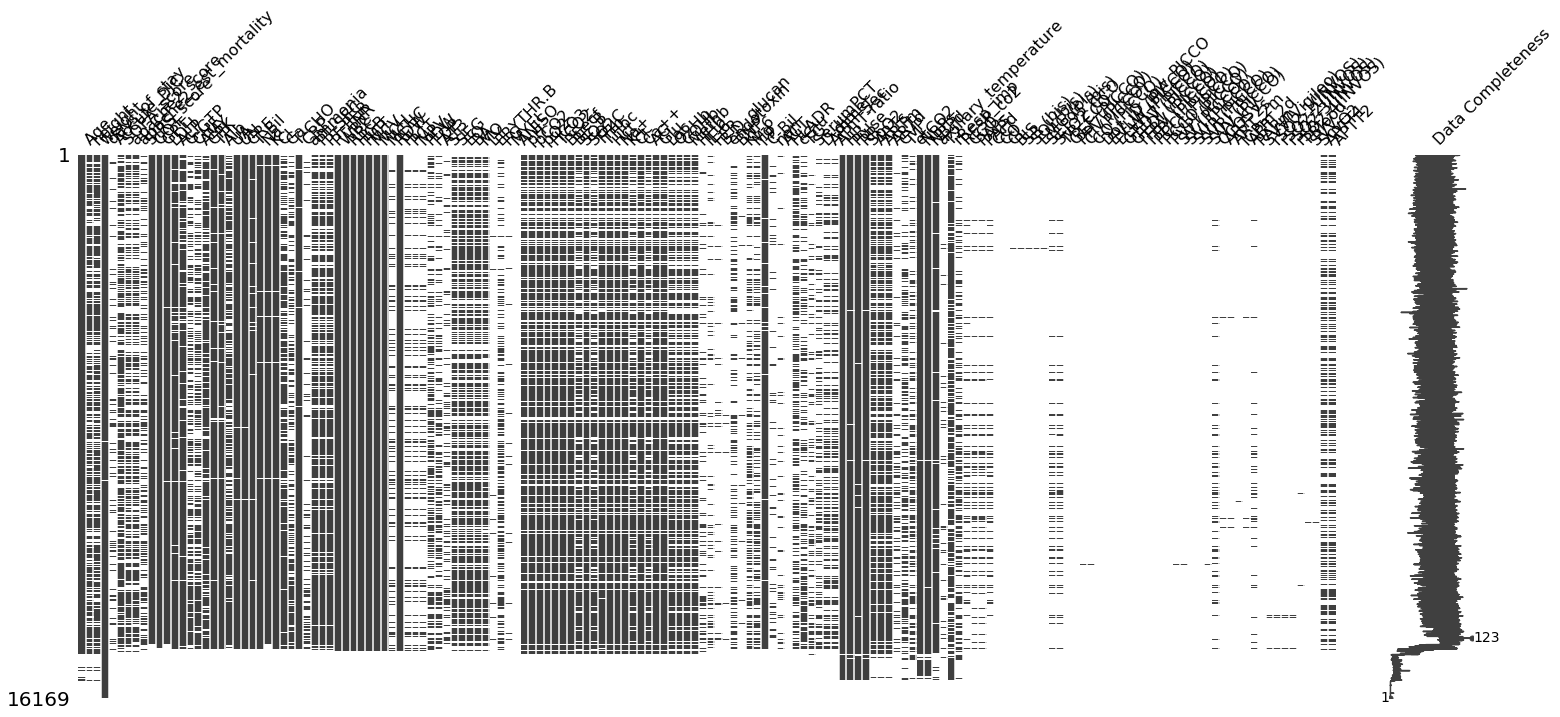

In [26]:
msno.matrix(df_sort, labels=True)


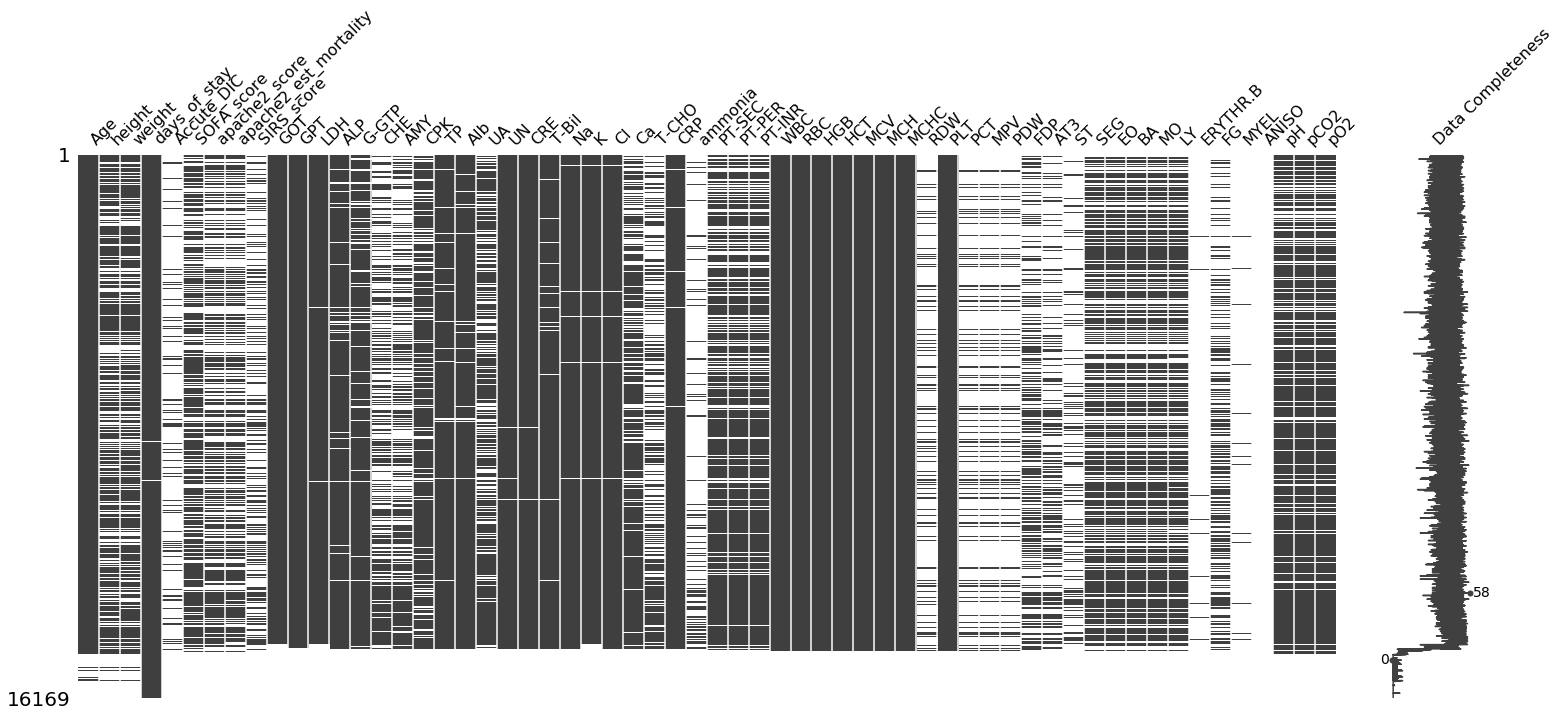

In [27]:
msno.matrix(df_sort.iloc[:,:60], labels=True)


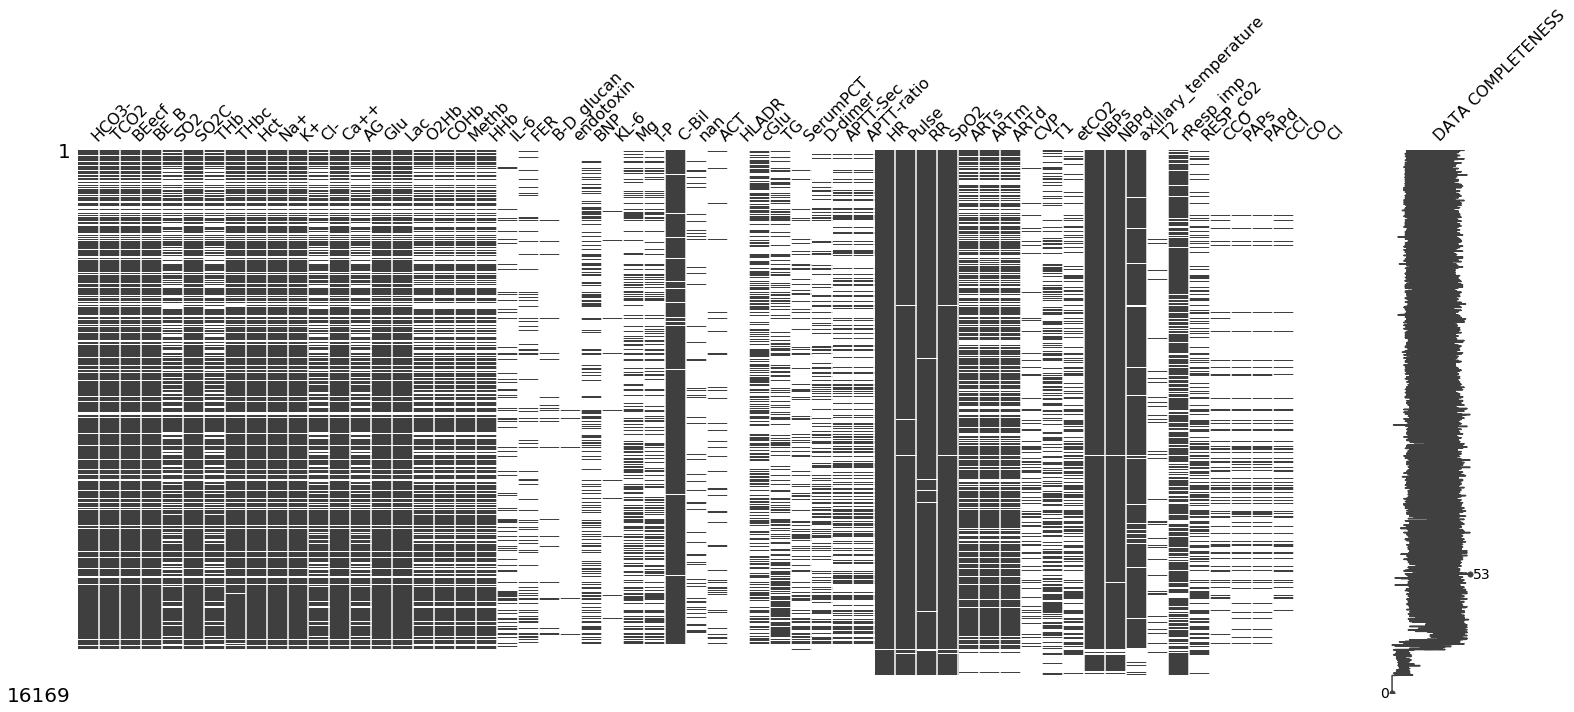

In [28]:
msno.matrix(df_sort.iloc[:,60:120], labels=True)


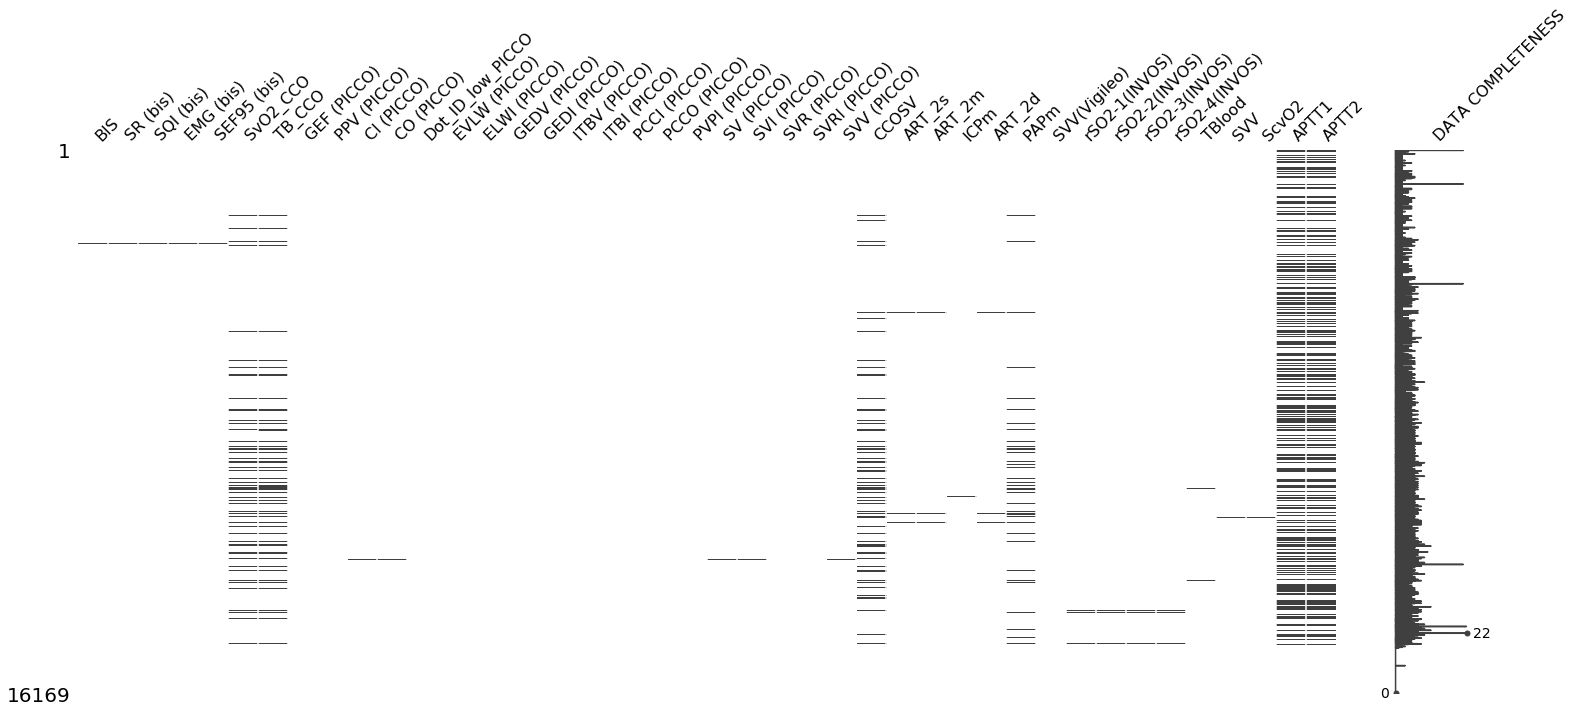

In [29]:
msno.matrix(df_sort.iloc[:,120:], labels=True)


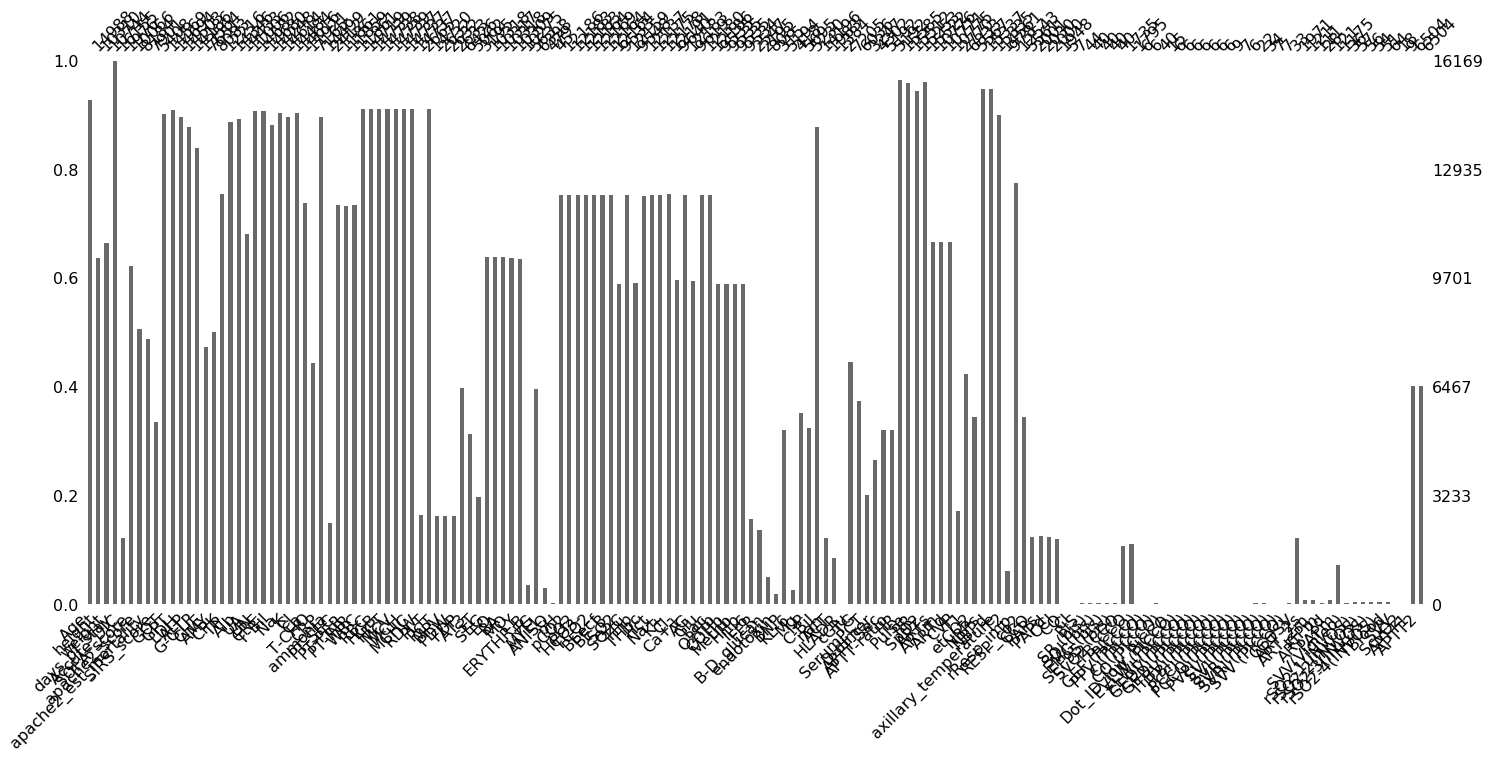

In [30]:
msno.bar(df,labels=True)

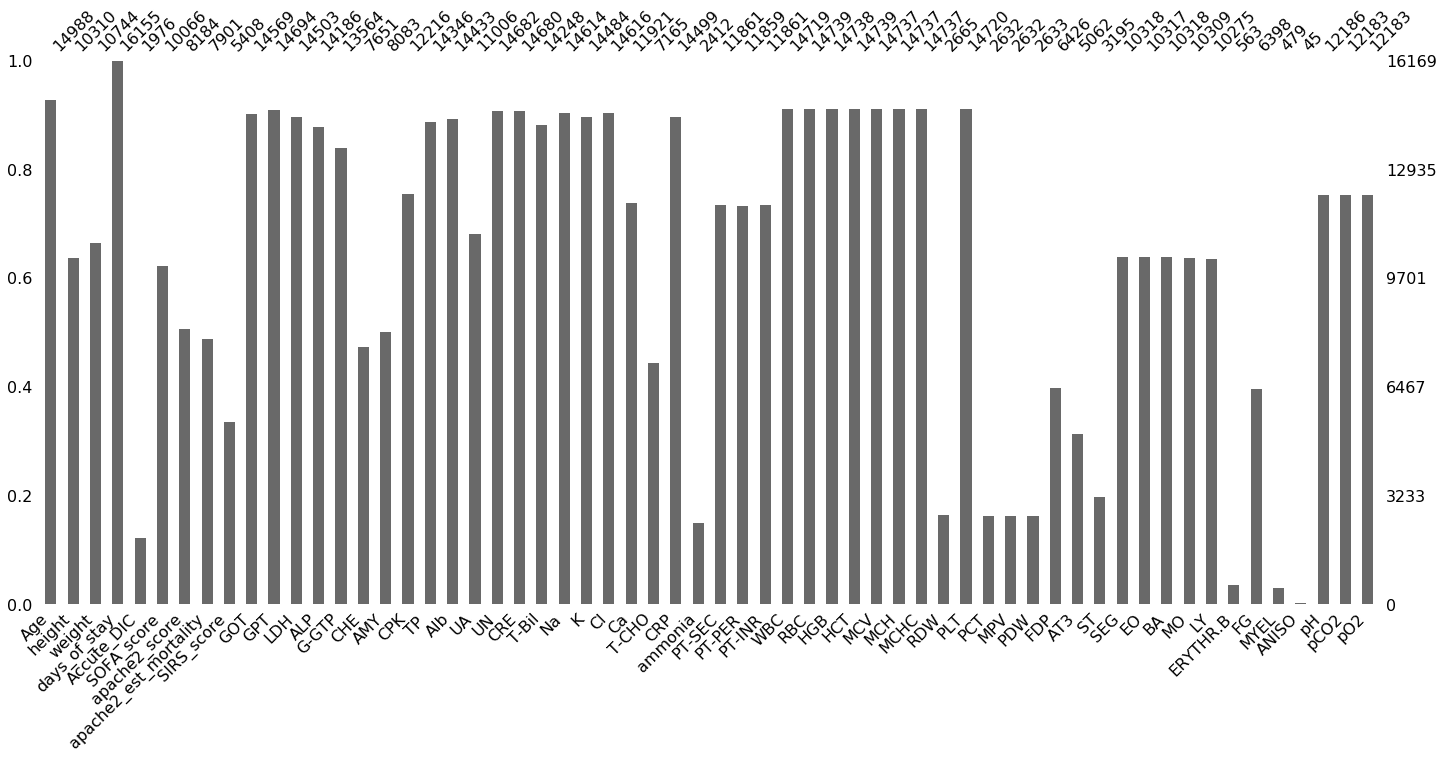

In [31]:
msno.bar(df.iloc[:,:60],labels=True)

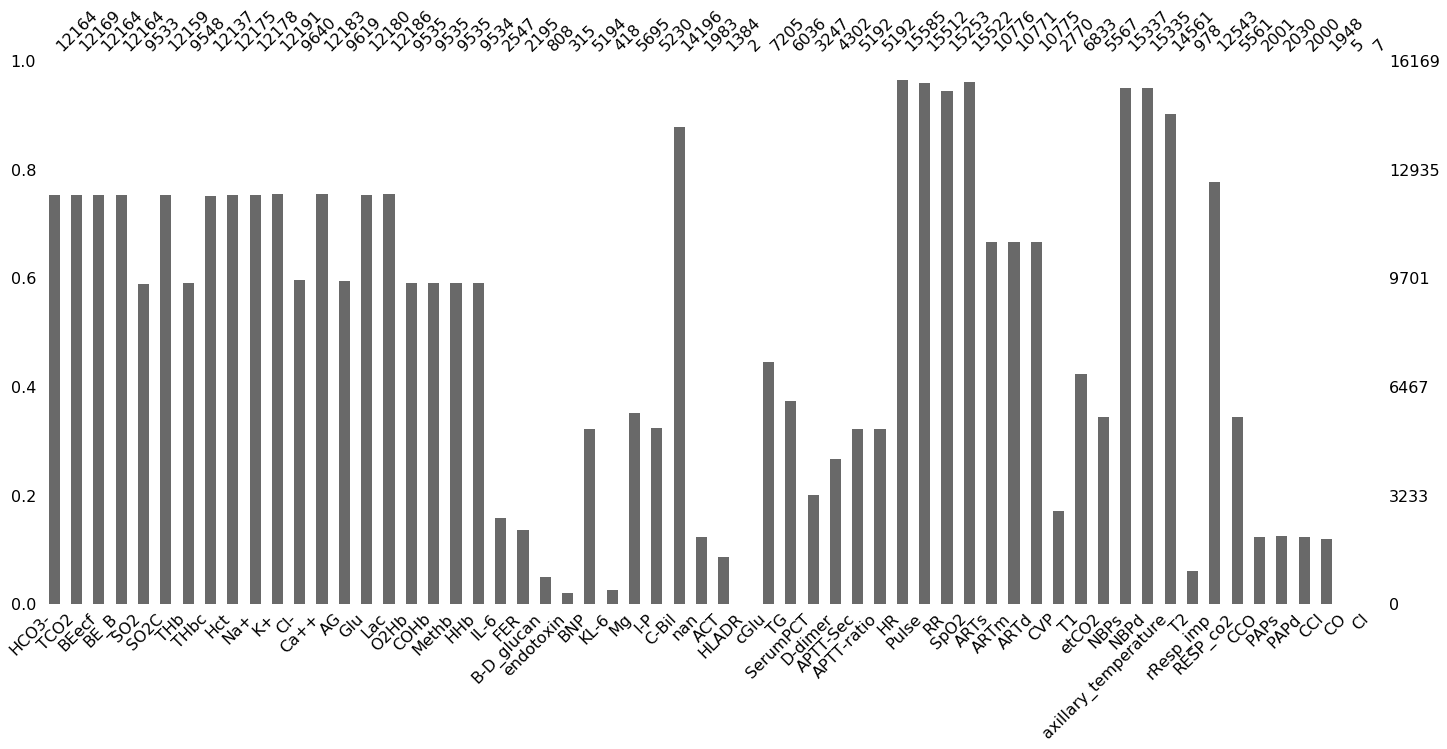

In [32]:
msno.bar(df.iloc[:,60:120],labels=True)

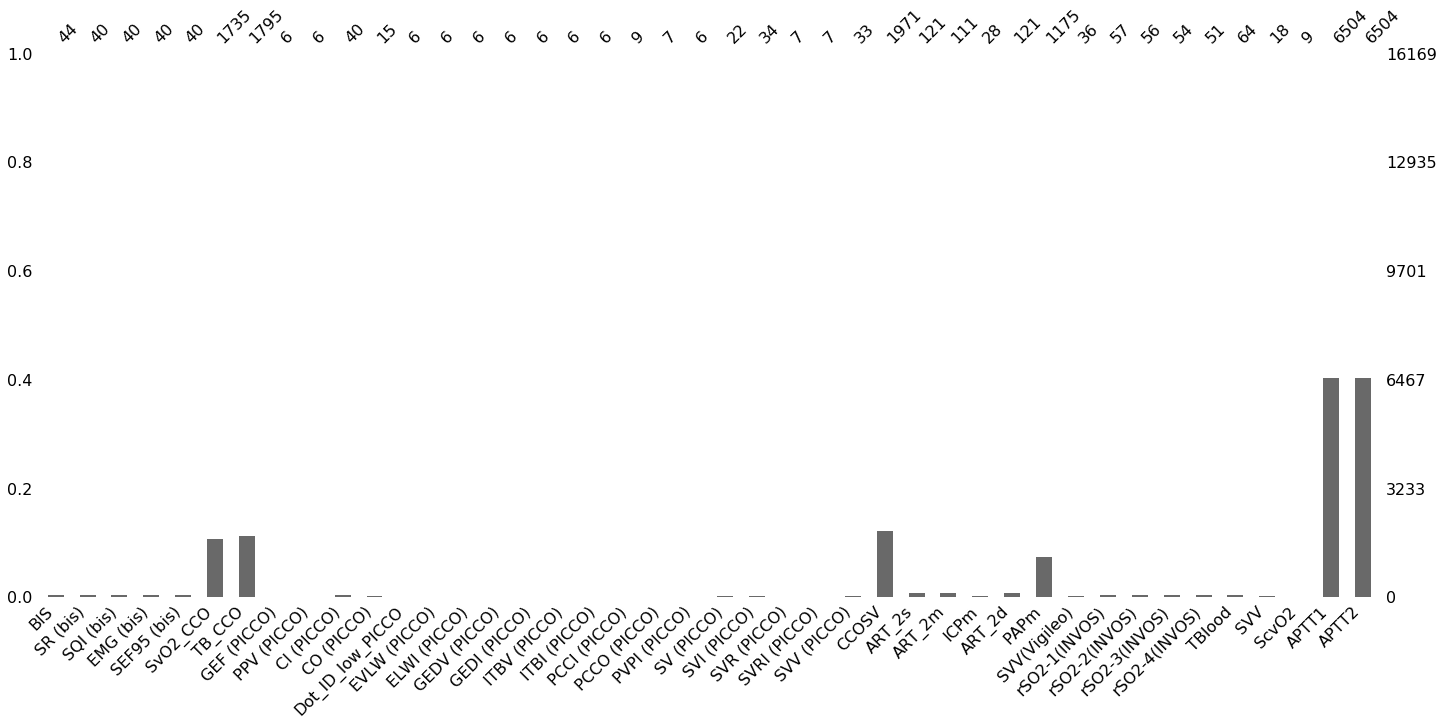

In [33]:
msno.bar(df.iloc[:,120:],labels=True)

# bed

In [34]:
cols_icu = ['bed_A1','bed_A2','bed_A3','bed_A4','bed_A5','bed_A6','bed_A7','bed_A8',
       'bed_C1','bed_C2','bed_C3','bed_C4','bed_C5','bed_C6',
       'bed_B1','bed_B2','bed_B3','bed_B4','bed_B5','bed_B6','bed_B7','bed_B8']
cols_not_icu = df_bed.columns.tolist()

for col in df_bed.columns:
    if col in cols_icu:
        cols_not_icu.remove(col)

In [35]:
df_sort_bed = pd.merge(df_sort, df_bed, left_index=True, right_index=True).sort_values(sort_cols)

# is ICU bed
df_sort_bed['bed_icu'] = 0
flag = False
for col in cols_icu:
    flag |= df_sort_bed[col] >= 1
df_sort_bed.loc[flag, 'bed_icu'] = 1

# is not ICU bed
df_sort_bed['bed_not_icu'] = 0
flag = False
for col in cols_not_icu:
    flag |= df_sort_bed[col] >= 1
df_sort_bed.loc[flag, 'bed_not_icu'] = 1

# minute
df_sort_bed['bed_icu_minutes'] = 0
for col in cols_icu:
    df_sort_bed[col].fillna(0, inplace=True)
    df_sort_bed['bed_icu_minutes'] += df_sort_bed[col]

df_sort_bed['bed_not_icu_minutes'] = 0
for col in cols_not_icu:
    df_sort_bed[col].fillna(0, inplace=True)
    df_sort_bed['bed_not_icu_minutes'] += df_sort_bed[col]

In [36]:
df_sort_bed_icu = df_sort_bed[df_sort_bed.bed_icu == 1]
df_sort_bed_not_icu = df_sort_bed[df_sort_bed.bed_not_icu == 1]

df_sort_bed_no_not_icu = df_sort_bed[df_sort_bed.bed_not_icu == 0]

df_sort_bed00 = df_sort_bed[(df_sort_bed.bed_icu == 0)&(df_sort_bed.bed_not_icu == 0)]
df_sort_bed01 = df_sort_bed[(df_sort_bed.bed_icu == 0)&(df_sort_bed.bed_not_icu == 1)]
df_sort_bed10 = df_sort_bed[(df_sort_bed.bed_icu == 1)&(df_sort_bed.bed_not_icu == 0)]
df_sort_bed11 = df_sort_bed[(df_sort_bed.bed_icu == 1)&(df_sort_bed.bed_not_icu == 1)]

print(len(df_sort_bed_icu))
len(df_sort_bed00), len(df_sort_bed01), len(df_sort_bed10), len(df_sort_bed11)

# 14982
# (0, 1187, 14115, 867)

14967


(3, 1199, 14137, 830)

In [37]:
df_sort_bed.sort_values('bed_not_icu_minutes',ascending=False).loc[:,'bed_Ward8':]

,,bed_Ward8,bed_Ward9,bed_Ward10,bed_EROPE,bed_ER1,bed_ER2,bed_Emergency5,bed_Emergency8,bed_Emergency10,bed_Temporary1,bed_Temporary2,bed_Emergency_Temporary1,bed_Emergency_Temporary2,bed_icu,bed_not_icu,bed_icu_minutes,bed_not_icu_minutes
pID,Ent_datetime,,,,,,,,,,,,,,,,,
3eVBDQqn,2012-11-07 14:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,2880.0
Q3lJ7069,2012-10-30 11:00,0.0,2880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,2880.0
3aXOGa72,2012-07-05 14:18,1438.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,1647.0
2NjdY6K2,2012-10-23 16:32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,1607.0
ng4e4zm9,2011-11-24 14:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9EJjlXl2,2017-01-05 14:18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1182.0,0.0
3QpyE8Y2,2011-01-19 17:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,995.0,0.0
2mz4yOZ3,2014-05-14 18:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1440.0,0.0


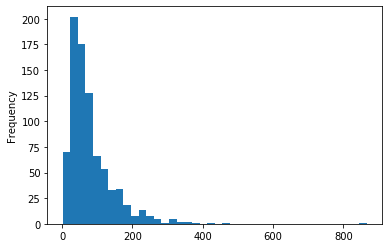

In [38]:
df_sort_bed11[df_sort_bed11.bed_not_icu_minutes < 1000].bed_not_icu_minutes.plot.hist(bins=40)

In [39]:
df_sort_bed00

,,Age,height,weight,days_of_stay,Accute_DIC,SOFA_score,apache2_score,apache2_est_mortality,SIRS_score,GOT,...,bed_Emergency8,bed_Emergency10,bed_Temporary1,bed_Temporary2,bed_Emergency_Temporary1,bed_Emergency_Temporary2,bed_icu,bed_not_icu,bed_icu_minutes,bed_not_icu_minutes
pID,Ent_datetime,,,,,,,,,,,,,,,,,,,,,
9XjVlAx3,2011-10-20 15:00,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
nq1jaBXn,2018-03-23 11:43,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
9JPQYry3,2011-10-20 15:17,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


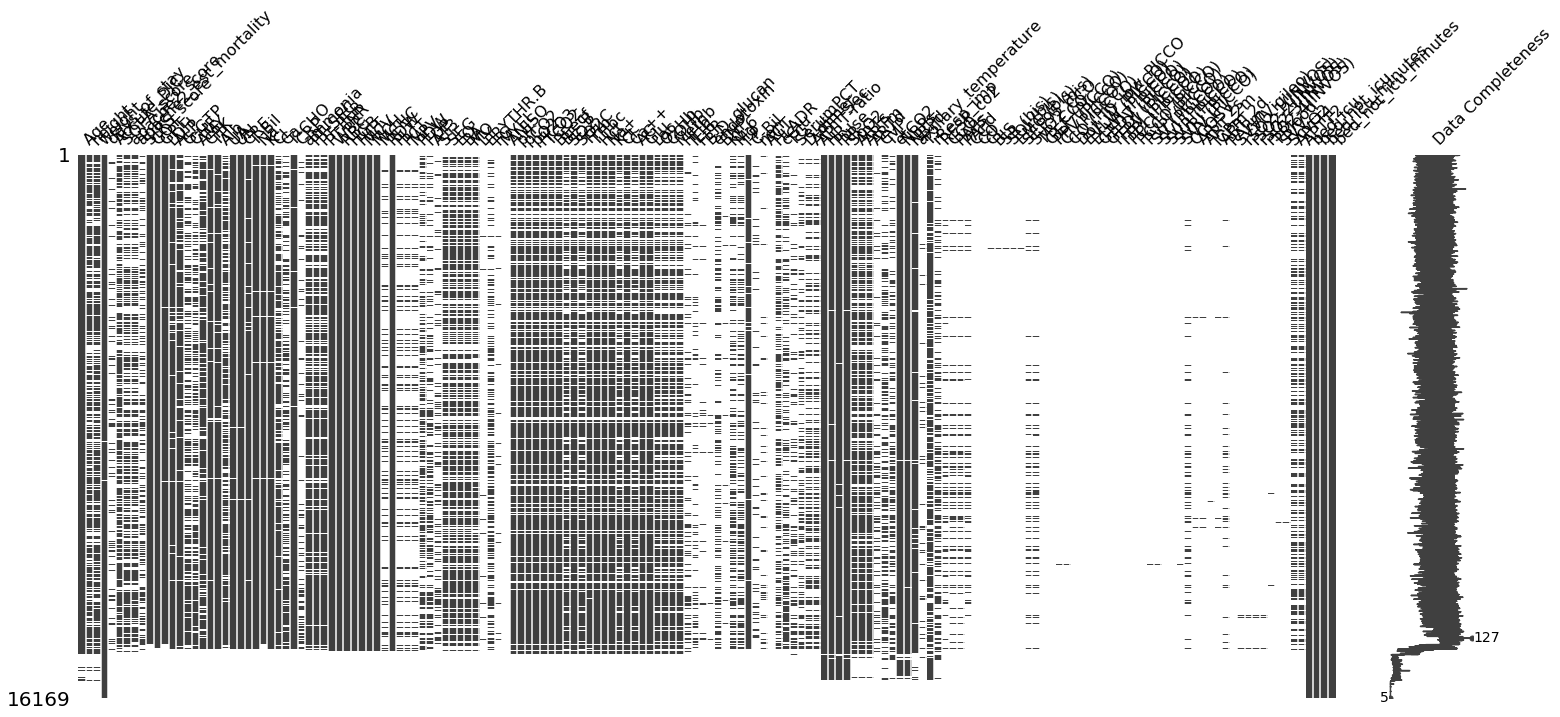

In [40]:
msno.matrix(df_sort_bed.drop(df_bed.columns.values, axis=1), labels=True)


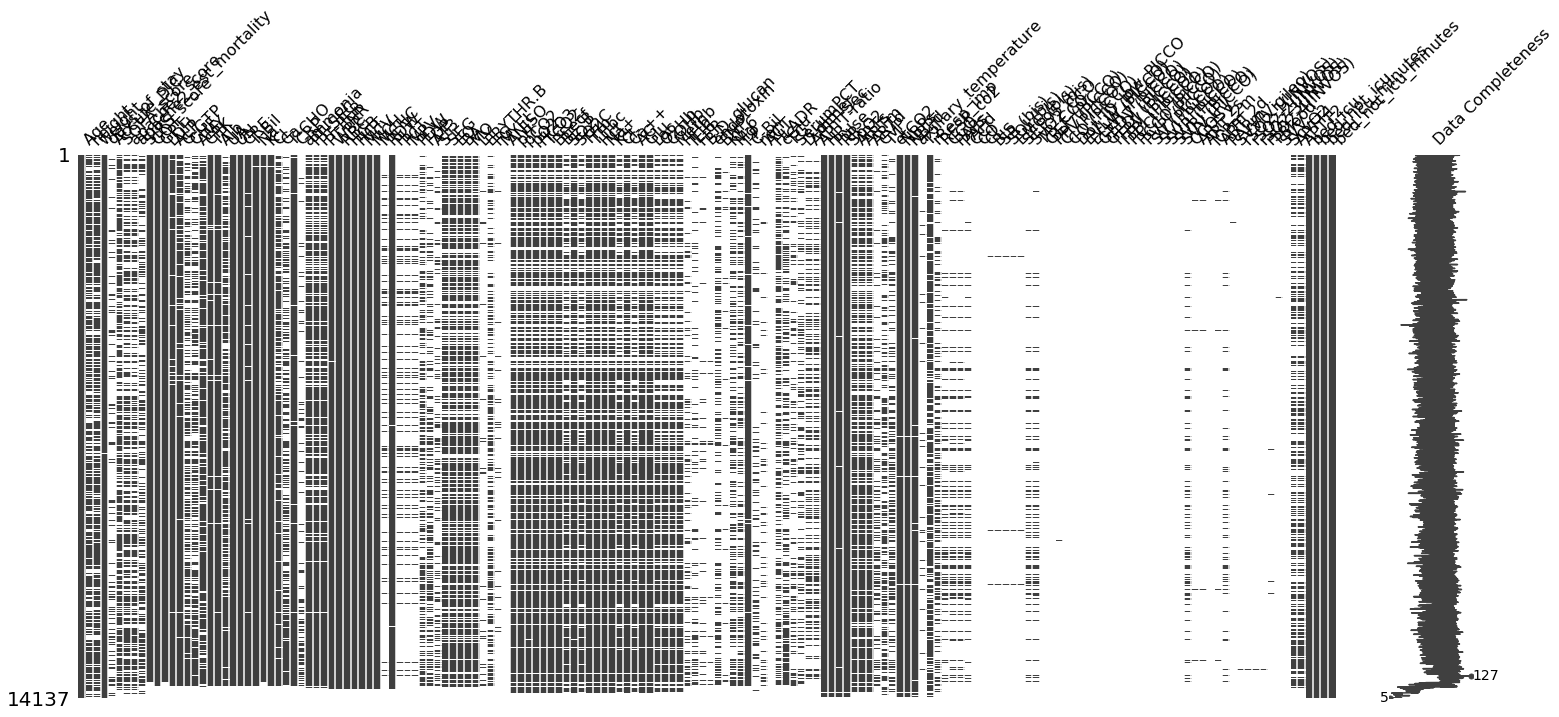

In [41]:
msno.matrix(df_sort_bed10.drop(df_bed.columns.values, axis=1), labels=True)


In [42]:
# msno.matrix(df_sort_bed10[df_sort_bed10.duration >= 1000].drop(df_bed.columns.values, axis=1), labels=True)


In [43]:
df_sort_bed11.columns.values

array(['Age', 'height', 'weight', 'days_of_stay', 'Accute_DIC',
       'SOFA_score', 'apache2_score', 'apache2_est_mortality',
       'SIRS_score', 'GOT', 'GPT', 'LDH', 'ALP', 'G-GTP', 'CHE', 'AMY',
       'CPK', 'TP ', 'Alb', 'UA', 'UN', 'CRE', 'T-Bil', 'Na', 'K', 'Cl',
       'Ca', 'T-CHO', 'CRP', 'ammonia', 'PT-SEC', 'PT-PER', 'PT-INR',
       'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'PLT',
       'PCT', 'MPV', 'PDW', 'FDP', 'AT3', 'ST', 'SEG', 'EO', 'BA', 'MO',
       'LY', 'ERYTHR.B', 'FG', 'MYEL', 'ANISO', 'pH', 'pCO2', 'pO2',
       'HCO3-', 'TCO2', 'BEecf', 'BE_B', 'SO2', 'SO2C', 'THb', 'THbc',
       'Hct', 'Na+', 'K+', 'Cl-', 'Ca++', 'AG', 'Glu', 'Lac', 'O2Hb',
       'COHb', 'Methb', 'HHb', 'IL-6', 'FER', 'B-D_glucan', 'endotoxin',
       'BNP', 'KL-6', 'Mg', 'I-P', 'C-Bil', 'nan', 'ACT', 'HLADR', 'cGlu',
       'TG', 'SerumPCT', 'D-dimer', 'APTT-Sec', 'APTT-ratio', 'HR',
       'Pulse', 'RR', 'SpO2', 'ARTs', 'ARTm', 'ARTd', 'CVP', 'T1',
       'etCO2', 'NBPs

In [44]:
df_sort_bed11.reset_index().sort_values('Ent_datetime')

,pID,Ent_datetime,Age,height,weight,days_of_stay,Accute_DIC,SOFA_score,apache2_score,apache2_est_mortality,...,bed_Emergency8,bed_Emergency10,bed_Temporary1,bed_Temporary2,bed_Emergency_Temporary1,bed_Emergency_Temporary2,bed_icu,bed_not_icu,bed_icu_minutes,bed_not_icu_minutes
620,njzBEk7n,2010-11-08 16:30,61.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1305.0,134.0
366,R9XkjAyn,2011-01-24 05:13,71.0,151.0,40.1,1.0,NaN,NaN,NaN,NaN,...,0.0,0.0,15.0,0.0,0.0,0.0,1,1,1418.0,15.0
299,ng4e4zm9,2011-11-22 14:00,50.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,101.0,1338.0
545,9wNzLwYn,2012-04-15 13:50,39.0,174.6,99.4,9.0,4.0,14.0,39.0,90.8,...,0.0,0.0,5.0,0.0,0.0,0.0,1,1,1433.0,5.0
174,9PNaOkx3,2012-08-03 10:30,77.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,399.0,1040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,nVroNkrn,2019-03-30 16:42,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,8.0,31.0
213,37vywE02,2019-03-30 21:30,69.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,934.0,28.0
409,9EDo4eEn,2019-03-30 22:02,45.0,175.0,96.6,1.0,NaN,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1396.0,44.0
785,2bpBvNan,2019-03-31 07:04,76.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,929.0,60.0


# delete fewer tested

In [45]:
df_sort2 = df_sort_bed10.drop(df_bed.columns.values, axis=1)

In [46]:
# df_ = df_sort_bed10.drop(df_bed.columns.values, axis=1)

# cols = ['GOT', 'GPT', 'LDH', 'ALP', 'G-GTP', 'CHE', 'AMY',
#        'CPK', 'TP ', 'Alb', 'UA', 'UN', 'CRE', 'T-Bil', 'Na', 'K', 'Cl',
#        'Ca', 'T-CHO', 'CRP', 'ammonia', 'PT-SEC', 'PT-PER', 'PT-INR',
#        'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'PLT',
#        'PCT', 'MPV', 'PDW', 'FDP', 'AT3', 'ST', 'SEG', 'EO', 'BA', 'MO',
#        'LY', 'ERYTHR.B', 'FG', 'MYEL', 'ANISO', 'pH', 'pCO2', 'pO2',
#        'HCO3-', 'TCO2', 'BEecf', 'BE_B', 'SO2', 'SO2C', 'THb', 'THbc',
#        'Hct', 'Na+', 'K+', 'Cl-', 'Ca++', 'AG', 'Glu', 'Lac', 'O2Hb',
#        'COHb', 'Methb', 'HHb', 'IL-6', 'FER', 'B-D_glucan', 'endotoxin',
#        'BNP', 'KL-6', 'Mg', 'I-P', 'C-Bil', 'ACT', 'HLADR', 'cGlu', 'TG',
#        'SerumPCT', 'D-dimer', 'APTT-Sec', 'APTT-ratio']
        
# condition = False
# for col in cols:
#     condition |= ~df_[col].isnull()
    
# print(len(df), len(df_), len(df_[condition]))

In [47]:
# df_sort2 = df_[condition]
# msno.matrix(df_sort2, labels=True)


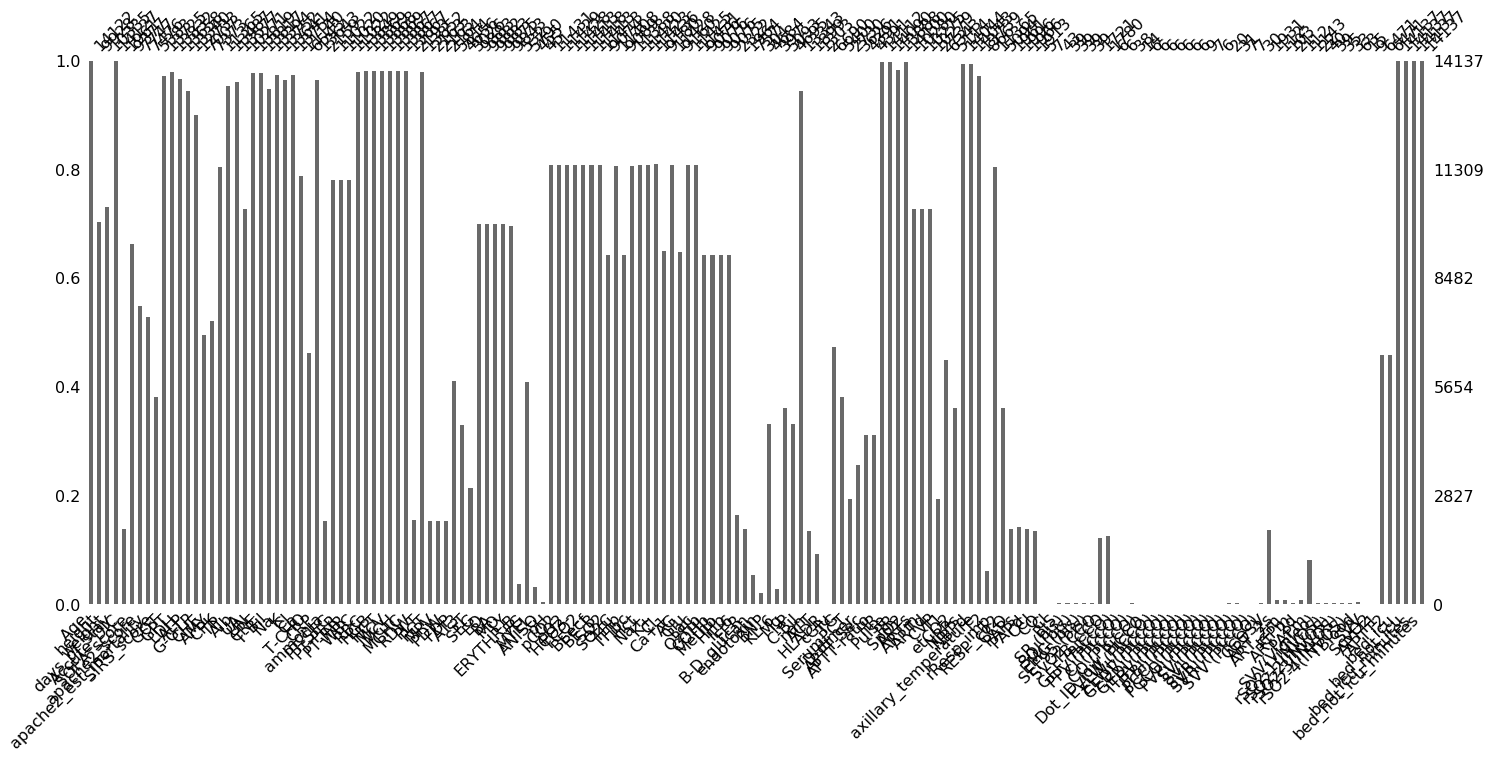

In [48]:
msno.bar(df_sort2,labels=True)

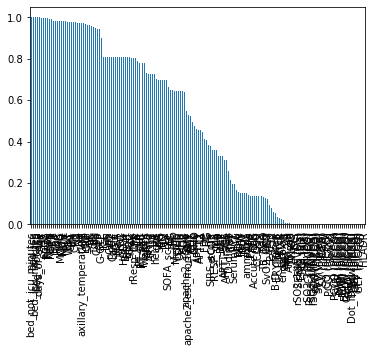

In [49]:
# ratio of not nan data
df_ = pd.DataFrame(df_sort2.notnull().sum(),columns=['val']).sort_values('val',ascending=False)
df_['ratio'] = df_.val / len(df_sort2)
df_.ratio.plot.bar()

In [50]:
# separate
cols = df_[df_.ratio >= NONULL_RATIO].index.tolist()
df = df_sort2[cols]
df

bed_not_icu_minutes  bed_icu  bed_icu_minutes  \
pID      Ent_datetime                                                      
nMYdPRbn 2013-06-28 19:52                  0.0        1           1440.0   
2Nj6ZDL2 2015-04-03 17:17                  0.0        1           1015.0   
310Xlkz2 2011-10-24 12:22                  0.0        1           1391.0   
2Nj6ZDL2 2014-08-15 19:18                  0.0        1           1197.0   
         2016-11-10 16:05                  0.0        1           1225.0   
...                                        ...      ...              ...   
9YBE0JW2 2012-01-15 23:52                  0.0        1             25.0   
nOWb4xGn 2013-01-18 10:31                  0.0        1              1.0   
9YmZJAW9 2010-12-05 12:30                  0.0        1              3.0   
KOnox9eB 2010-11-04 12:58                  0.0        1              2.0   
3QqDbQp3 2010-11-04 18:31                  0.0        1              1.0   

                           bed_not_icu  days_of_stay   Age     HR   SpO2  \
pID      Ent_datetime                                                      
nMYdPRbn 2013-06-28 19:52            0           2.0  68.0   86.0   98.0   
2Nj6ZDL2 2015-04-03 17:17            0           0.0  60.0   86.0   98.0   
310Xlkz2 2011-10-24 12:22            0          14.0  61.0  104.0  100.0   
2Nj6ZDL2 2014-08-15 19:18            0           0.0  60.0   79.0   99.0   
         2016-11-10 16:05            0           0.0  62.0   99.0   86.0   
...                                ...           ...   ...    ...    ...   
9YBE0JW2 2012-01-15 23:52            0           0.0  81.0    NaN    NaN   
nOWb4xGn 2013-01-18 10:31            0           0.0   NaN    NaN    NaN   
9YmZJAW9 2010-12-05 12:30            0           0.0   NaN    NaN    NaN   
KOnox9eB 2010-11-04 12:58            0           0.0   NaN    NaN    NaN   
3QqDbQp3 2010-11-04 18:31            0           0.0   NaN    NaN    NaN   

                           Pulse   NBPs  ...    AG   THb  Methb  COHb  O2Hb  \
pID      Ent_datetime                    ...                                  
nMYdPRbn 2013-06-28 19:52   85.0  130.0  ...  19.0   8.2    0.0   0.0  75.3   
2Nj6ZDL2 2015-04-03 17:17   84.0  108.0  ...   NaN   NaN    NaN   NaN   NaN   
310Xlkz2 2011-10-24 12:22  103.0   86.0  ...  14.0   9.9    1.2   0.1  97.4   
2Nj6ZDL2 2014-08-15 19:18   77.0  166.0  ...  10.0  10.8    1.3   2.7  73.2   
         2016-11-10 16:05  158.0  101.0  ...   NaN   NaN    NaN   NaN   NaN   
...                          ...    ...  ...   ...   ...    ...   ...   ...   
9YBE0JW2 2012-01-15 23:52    NaN    NaN  ...   NaN   NaN    NaN   NaN   NaN   
nOWb4xGn 2013-01-18 10:31    NaN    NaN  ...   NaN   NaN    NaN   NaN   NaN   
9YmZJAW9 2010-12-05 12:30    NaN    NaN  ...   NaN   NaN    NaN   NaN   NaN   
KOnox9eB 2010-11-04 12:58    NaN    NaN  ...   NaN   NaN    NaN   NaN   NaN   
3QqDbQp3 2010-11-04 18:31    NaN    NaN  ...   NaN   NaN    NaN   NaN   NaN   

                            HHb   SO2  apache2_score  apache2_est_mortality  \
pID      Ent_datetime                                                         
nMYdPRbn 2013-06-28 19:52  24.7  75.3           28.0                   42.2   
2Nj6ZDL2 2015-04-03 17:17   NaN   NaN            NaN                    NaN   
310Xlkz2 2011-10-24 12:22   1.3  98.7           44.0                   97.8   
2Nj6ZDL2 2014-08-15 19:18  22.9  76.2            NaN                    NaN   
         2016-11-10 16:05   NaN   NaN            NaN                    NaN   
...                         ...   ...            ...                    ...   
9YBE0JW2 2012-01-15 23:52   NaN   NaN            NaN                    NaN   
nOWb4xGn 2013-01-18 10:31   NaN   NaN            NaN                    NaN   
9YmZJAW9 2010-12-05 12:30   NaN   NaN            NaN                    NaN   
KOnox9eB 2010-11-04 12:58   NaN   NaN            NaN                    NaN   
3QqDbQp3 2010-11-04 18:31   NaN   NaN            NaN                    N

# sklern.impute

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ITER = 10
def impute(df_, random_state=0):
    imp = IterativeImputer(add_indicator=False, estimator=None,
             imputation_order='random', initial_strategy='mean',
             max_iter=ITER, max_value=None, min_value=None,
             missing_values=np.nan, n_nearest_features=None,
             random_state=random_state, sample_posterior=True, tol=0.001,
             verbose=2)
    
    # pool index
    df_index = pd.DataFrame([],index=df_.index)
    
    # delete target variable
    df_imp = df_.drop('days_of_stay',axis=1)
    
    imp.fit(df_imp)
    df_imputed = pd.DataFrame(imp.transform(df_imp), columns=df_imp.columns)
    
    # concat target variable
    df_imputed = pd.concat([df_.reset_index()['days_of_stay'], df_imputed],axis=1)
    
    # paste original index
    df_imputed.index = df_index.index
    
    return df_imputed

In [52]:
df.columns.values

array(['bed_not_icu_minutes', 'bed_icu', 'bed_icu_minutes', 'bed_not_icu',
       'days_of_stay', 'Age', 'HR', 'SpO2', 'Pulse', 'NBPs', 'NBPd', 'RR',
       'HCT', 'RBC', 'HGB', 'MCHC', 'MCH', 'MCV', 'PLT', 'WBC', 'GPT',
       'UN', 'CRE', 'Cl', 'Na', 'axillary_temperature', 'GOT', 'LDH',
       'CRP', 'K', 'Alb', 'TP ', 'T-Bil', 'C-Bil', 'ALP', 'G-GTP', 'K+',
       'Lac', 'pH', 'pCO2', 'pO2', 'Ca++', 'Glu', 'Na+', 'Hct', 'TCO2',
       'HCO3-', 'BEecf', 'BE_B', 'SO2C', 'THbc', 'rResp_imp', 'CPK', 'Ca',
       'PT-INR', 'PT-SEC', 'PT-PER', 'weight', 'ARTs', 'ARTd', 'ARTm',
       'UA', 'height', 'BA', 'SEG', 'EO', 'MO', 'LY', 'SOFA_score', 'Cl-',
       'AG', 'THb', 'Methb', 'COHb', 'O2Hb', 'HHb', 'SO2',
       'apache2_score', 'apache2_est_mortality', 'AMY'], dtype=object)

In [53]:
df_imputed = impute(df, RANDOM_STATE)

[IterativeImputer] Completing matrix with shape (14137, 79)
[IterativeImputer] Ending imputation round 1/10, elapsed time 4.61
[IterativeImputer] Ending imputation round 2/10, elapsed time 9.21
[IterativeImputer] Ending imputation round 3/10, elapsed time 13.77
[IterativeImputer] Ending imputation round 4/10, elapsed time 18.31
[IterativeImputer] Ending imputation round 5/10, elapsed time 23.09
[IterativeImputer] Ending imputation round 6/10, elapsed time 27.71
[IterativeImputer] Ending imputation round 7/10, elapsed time 32.32
[IterativeImputer] Ending imputation round 8/10, elapsed time 36.91
[IterativeImputer] Ending imputation round 9/10, elapsed time 41.48
[IterativeImputer] Ending imputation round 10/10, elapsed time 46.10
[IterativeImputer] Completing matrix with shape (14137, 79)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.69
[IterativeImputer] Ending imputation round 2/10, elapsed time 3.43
[IterativeImputer] Ending imputation round 3/10, elapsed time 5.14


# merge

In [54]:
df_merge = pd.merge(df_imputed, df_category, left_index=True, right_index=True)
df_merge

,,days_of_stay,bed_not_icu_minutes,bed_icu,bed_icu_minutes,bed_not_icu,Age,HR,SpO2,Pulse,NBPs,...,outcome2_Transfer doctor,outcome2_nan,Severity_of_sepsis_Cancel,Severity_of_sepsis_Dead,Severity_of_sepsis_Deterioration,Severity_of_sepsis_Did not change,Severity_of_sepsis_Healing,Severity_of_sepsis_Improved,Severity_of_sepsis_Transfer doctor,Severity_of_sepsis_nan
pID,Ent_datetime,,,,,,,,,,,,,,,,,,,,,
2mzOvV03,2013-12-25 12:53,26.0,0.0,1.0,1440.0,0.0,78.0,144.0,99.0,103.0,166.0,...,0,0,0,1,0,0,0,0,0,0
nMNGywb9,2012-10-10 16:44,0.0,0.0,1.0,1035.0,0.0,75.0,90.0,99.0,90.0,89.0,...,0,0,0,0,0,0,0,1,0,0
7nM0B6M3,2017-09-05 11:31,0.0,0.0,1.0,1384.0,0.0,31.0,69.0,99.0,71.0,92.0,...,0,0,0,0,0,0,0,1,0,0
63eK5jO9,2014-08-20 12:15,0.0,0.0,1.0,112.0,0.0,70.0,68.0,95.0,65.0,125.0,...,0,0,0,0,0,0,0,1,0,0
2B6ke6B2,2012-01-09 21:01,23.0,0.0,1.0,1352.0,0.0,68.0,119.0,93.0,59.0,113.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9yb66XZ2,2018-06-27 14:11,28.0,0.0,1.0,1440.0,0.0,47.0,77.0,100.0,76.0,129.0,...,0,0,0,0,0,0,0,1,0,0
2KPJdxJ3,2011-09-15 17:16,0.0,0.0,1.0,1050.0,0.0,70.0,65.0,99.0,65.0,157.0,...,0,0,0,0,0,0,0,1,0,0
3xpJOPQ3,2017-12-20 09:46,0.0,0.0,1.0,307.0,0.0,72.0,102.0,100.0,188.0,150.0,...,0,0,0,0,0,0,0,1,0,0


# outcome1

In [55]:
for col in df_category.columns:
    if 'outcome1' in col:
        print(col)

outcome1_Dead (no autopsy)
outcome1_Dead (with autopsy)
outcome1_Discharge
outcome1_Transfer
outcome1_Transfer building
outcome1_nan


In [56]:
df_merge['outcome1'] = 0
df_merge.loc[df_merge['outcome1_Dead (with autopsy)'] == 1,'outcome1'] = 1
df_merge.loc[df_merge['outcome1_Dead (no autopsy)'] == 1,'outcome1'] = 1
df_merge.loc[df_merge['outcome1_nan'] == 1,'outcome1'] = np.nan


# days_of_stay

In [57]:
# <=1d, <=2d, <=3d, <=1w, >2w
df_merge['dos_within_1d'] = 0
df_merge['dos_within_2d'] = 0
df_merge['dos_within_3d'] = 0
df_merge['dos_within_1w'] = 0
df_merge['dos_more_2w'] = 0

df_merge.loc[df_merge.days_of_stay.isnull(),'dos_within_1d'] = np.nan
df_merge.loc[df_merge.days_of_stay.isnull(),'dos_within_2d'] = np.nan
df_merge.loc[df_merge.days_of_stay.isnull(),'dos_within_3d'] = np.nan
df_merge.loc[df_merge.days_of_stay.isnull(),'dos_within_1w'] = np.nan
df_merge.loc[df_merge.days_of_stay.isnull(),'dos_more_2w'] = np.nan

df_merge.loc[df_merge.days_of_stay <= 1,'dos_within_1d'] = 1
df_merge.loc[df_merge.days_of_stay <= 2,'dos_within_2d'] = 1
df_merge.loc[df_merge.days_of_stay <= 3,'dos_within_3d'] = 1
df_merge.loc[df_merge.days_of_stay <= 7,'dos_within_1w'] = 1
df_merge.loc[df_merge.days_of_stay > 14,'dos_more_2w'] = 1

# delete hint

In [58]:
cols_del = []
for col in df_merge.columns:
    if 'outcome1_' in col or 'outcome2_' in col or 'Severity_of' in col or 'request_to_clinical_laboratory_' in col or col.startswith('bed_'):
        cols_del.append(col)
df_merge.drop(cols_del,axis=1,inplace=True)

# separate train, test

In [59]:
df_outcome1 = df_merge[~df_merge.outcome1.isnull()].drop('days_of_stay',axis=1)
# df_dos = df_merge[(~df_merge.days_of_stay.isnull())&(~df_merge.outcome1.isnull())&(df_merge.outcome1 != 1)].drop('outcome1',axis=1)
# df_dos = df_merge[(~df_merge.days_of_stay.isnull())].drop('outcome1',axis=1)


In [60]:
from sklearn.model_selection import train_test_split

def tt_split(df_, target):
    df_ = df_.reset_index().sort_values(['Ent_datetime','pID'])
    df_.set_index(index_col, inplace=True)
    X = df_.drop(target, axis=1)
    y = df_[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=2)
    df_train = pd.concat([X_train,y_train],axis=1)
    df_test = pd.concat([X_test,y_test],axis=1)
    
    return df_train, df_test

df_outcome1_train, df_outcome1_test = tt_split(df_outcome1, 'outcome1')
# df_dos_train, df_dos_test = tt_split(df_dos, 'days_of_stay')
# df_merge_train, df_merge_test = tt_split(df_merge, 'days_of_stay')

# make df_dos

In [61]:
df_dos_train = df_outcome1_train[df_outcome1_train.outcome1 == 0]
df_dos_test = df_outcome1_test[df_outcome1_test.outcome1 == 0]

l_train = len(df_dos_train)
l_test = len(df_dos_test)
l_test / (l_train + l_test) * 100

20.02802274787769

# save

In [62]:
df_outcome1_train.to_csv('../../../data/patient/imputation4/outcome1_train_{}h_{}.txt'.format(HOUR, RANDOM_STATE), sep='\t')
df_outcome1_test.to_csv('../../../data/patient/imputation4/outcome1_test_{}h_{}.txt'.format(HOUR, RANDOM_STATE), sep='\t')
df_dos_train.to_csv('../../../data/patient/imputation4/days_of_stay_train_{}h_{}.txt'.format(HOUR, RANDOM_STATE), sep='\t')
df_dos_test.to_csv('../../../data/patient/imputation4/days_of_stay_test_{}h_{}.txt'.format(HOUR, RANDOM_STATE), sep='\t')
# df_merge_train.to_csv('../../../data/patient/imputation4/all_train_{}h_{}.txt'.format(HOUR, RANDOM_STATE), sep='\t')
# df_merge_test.to_csv('../../../data/patient/imputation4/all_test_{}h_{}.txt'.format(HOUR, RANDOM_STATE), sep='\t')

In [63]:
# len(df_outcome1_train),len(df_outcome1_test),len(df_dos_train),len(df_dos_test),len(df_merge_train),len(df_merge_test)

In [64]:
df_merge.columns.values

array(['days_of_stay', 'Age', 'HR', 'SpO2', 'Pulse', 'NBPs', 'NBPd', 'RR',
       'HCT', 'RBC', 'HGB', 'MCHC', 'MCH', 'MCV', 'PLT', 'WBC', 'GPT',
       'UN', 'CRE', 'Cl', 'Na', 'axillary_temperature', 'GOT', 'LDH',
       'CRP', 'K', 'Alb', 'TP ', 'T-Bil', 'C-Bil', 'ALP', 'G-GTP', 'K+',
       'Lac', 'pH', 'pCO2', 'pO2', 'Ca++', 'Glu', 'Na+', 'Hct', 'TCO2',
       'HCO3-', 'BEecf', 'BE_B', 'SO2C', 'THbc', 'rResp_imp', 'CPK', 'Ca',
       'PT-INR', 'PT-SEC', 'PT-PER', 'weight', 'ARTs', 'ARTd', 'ARTm',
       'UA', 'height', 'BA', 'SEG', 'EO', 'MO', 'LY', 'SOFA_score', 'Cl-',
       'AG', 'THb', 'Methb', 'COHb', 'O2Hb', 'HHb', 'SO2',
       'apache2_score', 'apache2_est_mortality', 'AMY', 'Sex_F', 'Sex_M',
       'Sex_nan', 'Blood_ABO_A', 'Blood_ABO_AB', 'Blood_ABO_B',
       'Blood_ABO_O', 'Blood_ABO_other', 'Blood_ABO_t', 'Blood_ABO_nan',
       'Blood_Rh_Rh_+', 'Blood_Rh_Rh_-', 'Blood_Rh_nan',
       'department_Anesthesia_Pain_Palliative_Medicine',
       'department_Artificial_kidn

# number of sterben

In [65]:
len_df_category = len(df_category)
len_sterben = len(df_category[df_category['outcome1_Dead (with autopsy)'] == 1]) \
    + len(df_category[df_category['outcome1_Dead (no autopsy)'] == 1])

print('total:         ', len_df_category)
print('sterben:    ', len_sterben)
print('sterben%: ', len_sterben / len_df_category * 100)

total:          16169
sterben:     873
sterben%:  5.399220731028511
